In [1]:
import pandas as pd
import chord
import numpy as np
import csv

In [1]:
kk = {'a':1,'b':1,'c':2}
print(kk.values())

dict_values([1, 1, 2])


In [2]:
kkk = [1,2,3,4,4,4,5]
kkk.remove(4)
print(kkk)

[1, 2, 3, 4, 4, 5]


Initial Planning:
- Read in Data
- Create one hot vector
- Calculate the correlation based on the implied surgery
- Construct the chord diagram

In [3]:
# read in the data from corresponding address
data_loc = 'data/RDS_ICD10_DCODE.csv'
df = pd.read_csv(data_loc)
# keep the first 4 digits of the DCODE
# print out some descriptive statistics
df['ICD10_DCODE'] = df['ICD10_DCODE'].astype(str).apply(lambda x: x[:5])

In [4]:
df['INC_KEY'] = df['INC_KEY'].astype(str)

In [11]:
df.head(5)

,INC_KEY,ICD10_DCODE
0,160218483,S13.4
1,160218483,S02.6
2,160218483,S02.2
3,160218490,S06.5
4,160218490,S00.8


In [6]:
adj_list = df.groupby('INC_KEY')['ICD10_DCODE'].apply(list).reset_index(name='dcodes')

In [7]:
adj_list.sample(5)

,INC_KEY,dcodes
635345,160636943,[S51.8]
659231,160660830,"[S51.0, S46.9]"
155733,160155765,[S06.5]
780296,160782687,"[S80.2, S32.1, S27.3, S22.4, S00.8, S00.0]"
850690,160853166,[S72.0]


In [9]:
adj_list.dcodes.sample(5)

488297    [T23.3, T22.3, T22.2, T22.1]
704310    [S90.0, S90.0, S82.8, S82.4]
54919     [S06.0, S02.6, S02.6, S02.4]
139458           [S06.5, S06.0, S01.0]
866889    [T14.8, S52.5, S32.0, S06.5]
Name: dcodes, dtype: object

In [10]:
def write_to_file(inc_dcode, fname='adj_list.csv'):
    to_ignore = ['[',']','"', '\'']
    inc_dcode.dcodes = inc_dcode.dcodes.astype(str)
    for char in to_ignore:
        inc_dcode.dcodes = inc_dcode.dcodes.apply(lambda x: x.replace(char, ''))
    inc_dcode.dcodes.to_csv(fname, quoting=csv.QUOTE_NONNUMERIC, header=False, index=False)

write_to_file(adj_list)

<AxesSubplot:title={'center':'Distribution of codes per encounter'}, ylabel='Frequency'>

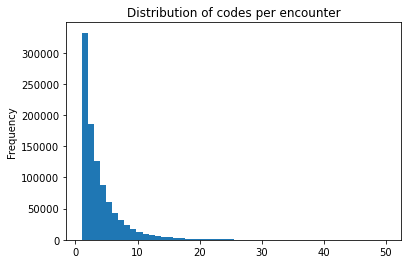

In [16]:
df.groupby(['INC_KEY'])['ICD10_DCODE'].count().sort_values(ascending = False).plot.hist(bins=50, xlabel="Number of codes", title="Distribution of codes per encounter")

<AxesSubplot:title={'center':'Distribution of prevalence of codes'}, xlabel='ICD10_DCODE'>

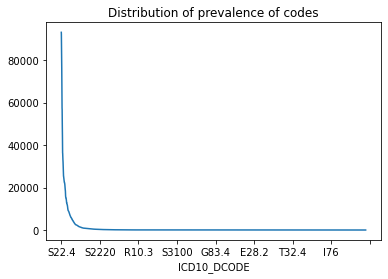

In [17]:
df.groupby(['ICD10_DCODE'])['INC_KEY'].count().sort_values(ascending = False).plot(title="Distribution of prevalence of codes")

In [10]:
# print out shape/dimension of the dataframe
df.shape

(3400946, 2)

In [ ]:
# print out the unique ICD10 DCODE in the dataset
len(df.ICD10_DCODE.unique())

3948

In [12]:
# print out the unique INC_KEY in the dataset
len(df.INC_KEY.unique())

968665

In [ ]:
# for demo presentation, we will only choose 10% of the data
random_number = np.random.choice(df.shape[0], 5000, replace=False)
df_sub = df.iloc[random_number,:]

In [ ]:
df_sub.reset_index(drop = True, inplace = True)
df_sub.head(5)

,INC_KEY,ICD10_DCODE
0,160861651,S30.8
1,160380964,S20.3
2,160132703,S01.3
3,160888083,S72.1
4,160600632,S42.0


In [ ]:
# useful link: https://medium.com/@chris.d.marker/building-an-adjacency-matrix-in-pandas-6d074d7a2795
# https://networkx.org/
# we need to create the IDC10_DCODE based on the INC_KEY columns
df_sub.INC_KEY.value_counts()


160768665    2
160716885    2
160188324    2
160692084    2
160626776    2
            ..
160109527    1
160794172    1
160008270    1
160566552    1
160879018    1
Name: INC_KEY, Length: 4983, dtype: int64

In [ ]:
# construct adjancy matrix out of it
df_sub.loc[df_sub.ICD10_DCODE == 'S06.319A']

,INC_KEY,ICD10_DCODE


In [ ]:
# we need to construct a pivot table 
df_sub['value'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_sub.head(5)

,INC_KEY,ICD10_DCODE,value
0,160861651,S30.8,1
1,160380964,S20.3,1
2,160132703,S01.3,1
3,160888083,S72.1,1
4,160600632,S42.0,1


In [ ]:
# starting of the pivot table creation
# note that if using the entire dataset, RAM overflows...
df_pivot = pd.pivot_table(df_sub, values='value', index=['INC_KEY'],
                    columns=['ICD10_DCODE'])

In [ ]:
df_pivot.fillna(0,inplace = True)

In [ ]:
df_pivot[df_pivot.columns[0]].sum()

161.0

In [ ]:
df_pivot

ICD10_DCODE,-1,A04.7,B19.2,B95.6,B96.2,D47.3,D51.9,D56.9,D62,D64.9,E03.9,E10.4,E11.4,E78.5,E87.1,E87.2,E87.6,F06.4,F10.1,F10.2,F11.2,F17.2,F41.9,F79,G30.1,G47.3,G89.2,G93.8,H05.2,H11.3,H26.1,H40.9,H57.1,H92.0,I10,I21.0,I25.1,I26.9,I34.1,I46.9,...,T24.2,T24.3,T25.2,T25.3,T27.0,T30.0,T31.0,T31.1,T33.5,T54.3,T58.8,T68.X,T70.4,T71.1,T76.1,T79.4,T79.7,T79.8,T79.A,T84.0,Z51.5,Z59.0,Z78.1,Z79.0,Z79.4,Z79.5,Z79.8,Z85.3,Z85.7,Z87.8,Z88.0,Z88.2,Z91.8,Z95.0,Z95.5,Z96.6,Z98.1,Z98.6,Z99.8,nan
INC_KEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
160000335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160000621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160000790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160000855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160001002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160969141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160969575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160970432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Next Step:
# 1. Get the correlation matrix among this
# 2. Construct the chord diagram

In [ ]:
df_pivot.shape

(4983, 498)

In [ ]:
temp = df_pivot.T@df_pivot

In [ ]:
# we can convert the adjacency matrix to adjacency list

In [ ]:
df_sub.loc[df_sub.INC_KEY == 160460143]

,INC_KEY,ICD10_DCODE,value


In [ ]:
temp

ICD10_DCODE,-1,A04.7,B19.2,B95.6,B96.2,D47.3,D51.9,D56.9,D62,D64.9,E03.9,E10.4,E11.4,E78.5,E87.1,E87.2,E87.6,F06.4,F10.1,F10.2,F11.2,F17.2,F41.9,F79,G30.1,G47.3,G89.2,G93.8,H05.2,H11.3,H26.1,H40.9,H57.1,H92.0,I10,I21.0,I25.1,I26.9,I34.1,I46.9,...,T24.2,T24.3,T25.2,T25.3,T27.0,T30.0,T31.0,T31.1,T33.5,T54.3,T58.8,T68.X,T70.4,T71.1,T76.1,T79.4,T79.7,T79.8,T79.A,T84.0,Z51.5,Z59.0,Z78.1,Z79.0,Z79.4,Z79.5,Z79.8,Z85.3,Z85.7,Z87.8,Z88.0,Z88.2,Z91.8,Z95.0,Z95.5,Z96.6,Z98.1,Z98.6,Z99.8,nan
ICD10_DCODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A04.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B19.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B95.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B96.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Z98.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Z98.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
temp.melt('ICD10_DCODE','ICD10_DCODE')

KeyError: ignored

In [ ]:
# import networkx package
import networkx as nx

In [ ]:
network =  nx.from_numpy_matrix(np.array(temp), create_using=nx.MultiGraph)

In [ ]:
network[1][1]

AtlasView({0: {'weight': 1.0}})

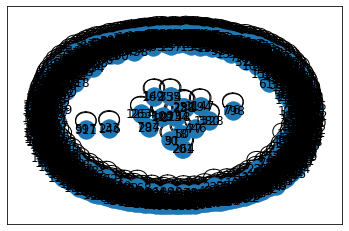

In [ ]:
nx.draw_networkx(network)